# Creating a Sea Temperature Data Map

In this notebook you'll learn how to adapt existing code to fit your particular data set. You won't need to use all of these functions again, but you should understand how they work.

**Reminder: To run the code in a Jupyter Notebook cell, click inside the cell and press "shift" and "return" on your keyboard at the same time.**

Let's start out by importing all the libraries we'll need:

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv # This is a library that allows us to work with CSV files even if we're not using pandas

This code opens the data file, create a CSV reader object to read the data, and converts it into a list or lists using the built in Python list() function.

In [2]:
csvFile = open("SeaTemp12_2017.csv", 'r') 
# 'r' = read from file but not gunna make any changes.
csvReader = csv.reader(csvFile, delimiter=',')
#CSV.READER IS A FUNCTION
data_lists = list(csvReader)

Let's take a look at the first item in data_lists:

In [3]:
print(data_lists[0])

['99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', '99999', 

That was a lot of data! Let's use the len() function to find out how many data points there were in **just one row**:

In [4]:
len(data_lists[0])

720

Let's find out how many of those there are! Use the len() function:

In [5]:
len(data_lists)

360

The number of items in one row is also the width of the image we are creating. The number of rows is the height. Let's assign these values to variable so we can use them later:

In [6]:
height = len(data_lists)
width = len(data_lists[0])

Now we're going to use a new numpy function that creates an empty matrix. A matrix is like a grid made up of lists.

In [7]:
grid = np.empty([height, width, 3], dtype=np.uint8) 
# We have to specify the height and width of the matrix along with the number of items 
# we can put in each spot on the grid. We want 3 because each color value has 3 numbers.
# Finally, we specify the type of data we will put into the matrix.

Now we're going to use some code you're used to: "for loops" and conditionals! But we are making things a little more complicated using the enumerate() function. Using enumerate(), you keep track of both the index and the value in a "for loop".

In [14]:
all_values = [] # We will fill in this empty list with all the data values as we go

for r, row in enumerate(data_lists):
    for c, value in enumerate(row):
        if float(value) < 99999:
            all_values.append(float(value)) # This is where we fill in the list with all data values
        if float(value) <= 0:
            grid[r, c] = [6, 62, 226] # blue
        elif float(value) <= 5:
            grid[r, c] = [48, 18, 168] # dark purple
        elif float(value) <= 10:
            grid[r, c] = [103, 25, 193] # bright purple
        elif float(value) <= 15:
            grid[r, c] = [204, 29, 224] # pinkish
        elif float(value) <= 20:
            grid[r, c] = [239, 16, 206] # pink
        elif float(value) <= 25:
            grid[r, c] = [224, 17, 134] # pink
        elif float(value) <= 30:
            grid[r, c] = [214, 25, 91] #hot pinkish
        elif float(value) <= 33:
            grid[r, c] = [239, 15, 138] #pinkaliish
        elif float(value) <= 35:
            grid[r, c] = [237, 36, 14] #red
        else:
            grid[r, c] = [40, 11, 8]

Now that we have all of our data in a single list, we can find the max and the min:
Hint: Use this information to help you adjust your conditionals!

In [15]:
print(min(all_values))
print(max(all_values))
print(np.mean(all_values))

-2.0
35.0
18.601965563280896


Now it's time to use matplotlib to show our image! We already imported the library, so we can get right to it:

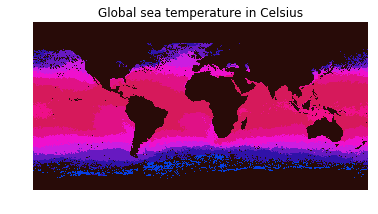

In [22]:
plt.title("Global sea temperature in Celsius")
plt.imshow(grid)
plt.axis('off')
plt.savefig("Sea_temperature_2017.png",dpi = 1000)
plt.show()

## Coding Challenge:
Change the code so that you create a map for the sea temperature in 2017.